In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Lendo os dados de treino : 

In [3]:
train = pd.read_csv("train.csv")
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
train.shape

(200000, 202)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
nan = np.array(train.isna().sum())
for i in nan:
    if i != 0:
        print(f"{i} != 0")

In [7]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
y = np.array(train.loc[:, 'target'])
x = train.loc[:, ~train.columns.isin(['target', 'ID_code'])].astype(float)

In [9]:
np.unique(train.loc[:, 'target'], return_counts = True)

(array([0, 1]), array([179902,  20098]))

In [10]:
train.shape

(200000, 202)

In [15]:
scaler = StandardScaler()

X = scaler.fit_transform(x)
x_scaled = pd.DataFrame(X, columns = x.columns)
x_scaled

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.265814,0.279509,-0.928851,-1.606375,-0.454632,2.120424,0.302273,-0.407906,-0.271576,-1.538651,...,0.637526,1.915840,1.394910,-0.599439,0.009925,-1.155623,-0.025161,-0.407496,0.264130,-1.392947
199996,-1.896359,-0.202660,2.268180,-0.079297,-1.705783,-0.699136,0.543790,1.476902,-1.189411,-1.267410,...,0.378661,-0.920696,-0.830643,-0.375167,1.364499,1.312319,-0.819242,-2.350481,0.011518,0.351154
199997,0.178710,-0.845469,-0.076676,-0.563266,-1.070350,-0.043657,-0.984818,1.466106,-0.049199,-1.137053,...,0.182166,-0.660547,0.795012,0.387655,1.766202,-1.001499,-0.187031,-0.209042,-0.676806,0.721024
199998,-0.317467,-1.723980,1.096301,-0.491128,0.886530,0.712074,0.737304,0.137314,-0.743186,0.961052,...,-0.120713,0.403634,0.545083,1.950397,0.772535,0.044417,0.824051,1.221803,-0.113526,-1.012989


#### Anaisando se há alguma correlação entre as colunas : 

In [11]:
# Define the threshold

corr = x_scaled.corr()
multicol_thresh = 0.7

# A correlação entre as variáveis é muito baixa, indica que não há multicolinearidade.

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if i != j and corr.iloc[i, j] > multicol_thresh:  # Avoid self-correlations
            print(f'Correlation between {corr.columns[i]} and {corr.columns[j]}: {corr.iloc[i, j]}')


NameError: name 'x_scaled' is not defined

In [17]:
corr

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,0.000049,0.004549,0.001194,-0.000918,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,-0.000868,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,0.000052,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,0.003701,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,0.002343,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


In [13]:
X = x

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

### Primeiro usando as redes neurais : 

In [19]:
%%time

# Criando o modelo classificador com o otimizador ADAM : 

mlp_with_adam = MLPClassifier(solver = 'adam', max_iter = 100, alpha = 0.0001, beta_1 = 0.9, beta_2 = 0.999)


n_neurons = [
    (i, j) for i in range(1, 5) for j in range(1, 2)
]


actv = ['logistic', 'tanh']

parameters = {'hidden_layer_sizes': n_neurons,
             'activation' : actv}

# O GridSearch será com os dados de treinamento : 

mlp_adam_clf = GridSearchCV(estimator = mlp_with_adam, param_grid = parameters, cv = 10, scoring = "roc_auc").fit(X_train, y_train)

bparam_adam_hidd = mlp_adam_clf.best_params_['hidden_layer_sizes']
bparam_adam_actv = mlp_adam_clf.best_params_['activation']

print(f"The best param is with layers : {bparam_adam_hidd}, activation : {bparam_adam_actv} and the accuracy is : {mlp_adam_clf.best_score_}")

The best param is with layers : (1, 1), activation : logistic and the accuracy is : 0.8580781287011996
CPU times: user 30min 17s, sys: 46min 35s, total: 1h 16min 53s
Wall time: 17min 58s


In [20]:
%%time


# Fazendo um loop para pegar a acurácia média do classificador nos dados de treino: 

result_ml_adam = list()

mlp_adam = MLPClassifier(hidden_layer_sizes = bparam_adam_hidd, activation = bparam_adam_actv, 
                         solver = 'adam', alpha = 0.0001, beta_1 = 0.9, beta_2 = 0.999, max_iter = 100)


for i in range(10):
    x, y = shuffle(X_train, y_train, random_state = 42)
    result_ml_adam.append(np.mean(cross_val_score(mlp_adam, x, y, cv = 10)))

result_ml_adam = np.array(result_ml_adam)
print(f"The accuracy for mlp is {np.mean(result_ml_adam)} +- {statistics.stdev(result_ml_adam)}")

The accuracy for mlp is 0.9137124999999999 +- 0.00015172617880025423
CPU times: user 1h 55min 53s, sys: 4h 24min 52s, total: 6h 20min 45s
Wall time: 50min 42s


In [21]:
%%time

# Pegando os dados para a curva AUC gerada pela rede MLP com o ADAM : 

y_pred_proba_adam = mlp_adam.fit(X_train, y_train).predict_proba(X_test)[:, 1]

fpr_adam, tpr_adam, thresholds_adam = metrics.roc_curve(y_test,  y_pred_proba_adam)
auc_adam = metrics.roc_auc_score(y_test, y_pred_proba_adam)

print(f"The AUC value for the mlp using adam is : {auc_adam}")
print(f"acc SGD in test : {accuracy_score(y_test, y_pred_proba_adam >= 0.5)}")

The AUC value for the mlp using adam is : 0.858966663450146
acc SGD in test : 0.9143
CPU times: user 1min 2s, sys: 2min 14s, total: 3min 16s
Wall time: 25 s


In [22]:
print(f"acc ADAM in test : {accuracy_score(y_test, y_pred_proba_adam >= 0.5)}")

acc ADAM in test : 0.9143


##### 2.2.2- MLP com otimizador gradiente estocástico : 

In [23]:
%%time

# Agora, realizando o treinamento para a rede MLP com o otimizador do gradiente estocástico.


mlp_with_sgd = MLPClassifier(solver = 'sgd', alpha = 0.0001, learning_rate = 'constant', learning_rate_init = 0.001,
                             batch_size = 'auto', max_iter = 100)



mlp_sgd_clf = GridSearchCV(estimator = mlp_with_sgd, param_grid = parameters, cv = 10, scoring = "roc_auc").fit(X_train, y_train)

bparam_sgd_hidd = mlp_sgd_clf.best_params_['hidden_layer_sizes']
bparam_sgd_actv = mlp_sgd_clf.best_params_['activation']

print(f"The best param is with layers : {bparam_sgd_hidd}, activation : {bparam_sgd_actv} and the accuracy is : {mlp_sgd_clf.best_score_}")

The best param is with layers : (1, 1), activation : tanh and the accuracy is : 0.8573543535989036
CPU times: user 31min 58s, sys: 48min 54s, total: 1h 20min 53s
Wall time: 19min 33s


In [24]:
%%time


# Fazendo um loop para pegar a acurácia média do classificador nos dados de treino: 

result_ml_sgd = list()


mlp_sgd = MLPClassifier(hidden_layer_sizes = bparam_sgd_hidd, activation = bparam_sgd_actv, 
                         solver = 'sgd', alpha = 0.0001, learning_rate = 'constant', learning_rate_init = 0.001, batch_size = 'auto', max_iter = 100)


for i in range(10):
    x, y = shuffle(X_train, y_train, random_state = 42)
    result_ml_sgd.append(np.mean(cross_val_score(mlp_sgd, x, y, cv = 10)))

result_ml_sgd = np.array(result_ml_sgd)
print(f"The accuracy for mlp is {np.mean(result_ml_sgd)} +- {statistics.stdev(result_ml_sgd)}")

The accuracy for mlp is 0.9134650000000001 +- 0.0005179520301683727
CPU times: user 1h 33min 11s, sys: 3h 33min 54s, total: 5h 7min 5s
Wall time: 40min 31s


In [25]:
%%time

# Pegando os dados para a curva AUC gerada pela rede MLPcom o SGD : 

y_pred_proba_sgd = mlp_sgd.fit(X_train, y_train).predict_proba(X_test)[:, 1]

fpr_sgd, tpr_sgd, thresholds_sgd = metrics.roc_curve(y_test,  y_pred_proba_sgd)
auc_sgd = metrics.roc_auc_score(y_test, y_pred_proba_sgd)

print(f"The AUC value for the mlp using sgd is : {auc_sgd}")
print(f"acc SGD in test : {accuracy_score(y_test, y_pred_proba_sgd >= 0.5)}")

The AUC value for the mlp using sgd is : 0.8587880179270941
acc SGD in train : 0.914325
CPU times: user 1min 10s, sys: 2min 30s, total: 3min 41s
Wall time: 28.1 s


In [26]:
print(f"acc SGD in test : {accuracy_score(y_test, y_pred_proba_sgd >= 0.5)}")

acc SGD in test : 0.914325


##### 2.2.3- Usando o KNN para realizar a classificação : 

In [27]:
%%time

neigh = KNeighborsClassifier()

n_neighbors = np.arange(start = 1, stop = 50, step = 1)
parameters = {'n_neighbors': n_neighbors}

knn_clf = GridSearchCV(estimator = neigh, param_grid = parameters, cv = 10, scoring = "roc_auc").fit(X_train, y_train)

bparam_knn = knn_clf.best_params_['n_neighbors']
print(f"The best param is {bparam_knn} and the accuracy is : {knn_clf.best_score_}")

The best param is 49 and the accuracy is : 0.6759680292753072
CPU times: user 5h 3min 55s, sys: 15.6 s, total: 5h 4min 11s
Wall time: 1h 18min 54s


In [28]:
%%time

# Fazendo um loop para pegar a acurácia média do classificador KNN : 

result_knn = list()

knn_blam = KNeighborsClassifier(n_neighbors = bparam_knn)

for i in range(10):
    x, y = shuffle(X_train, y_train, random_state = 42)
    result_knn.append(np.mean(cross_val_score(knn_blam, x, y, cv = 10)))

result_knn = np.array(result_knn)
print(f"The accuracy for KNN is {np.mean(result_knn)} +- {statistics.stdev(result_knn)}")

The accuracy for KNN is 0.8995812500000001 +- 0.0
CPU times: user 1h 58s, sys: 3.78 s, total: 1h 1min 1s
Wall time: 15min 50s


In [29]:
%%time

# Pegando os dados para a curva AUC gerada pelo modelo knn : 

y_pred_proba_knn = knn_blam.fit(X_train, y_train).predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test,  y_pred_proba_knn)
auc_knn = metrics.roc_auc_score(y_test, y_pred_proba_knn)

print(f"The AUC value for the knn is : {auc_knn}")
print(f"acc KNN in test : {accuracy_score(y_test, y_pred_proba_knn >= 0.5)}")

The AUC value for the knn is : 0.6773315866782637
acc KNN in train : 0.899225
CPU times: user 1min 41s, sys: 0 ns, total: 1min 41s
Wall time: 26 s


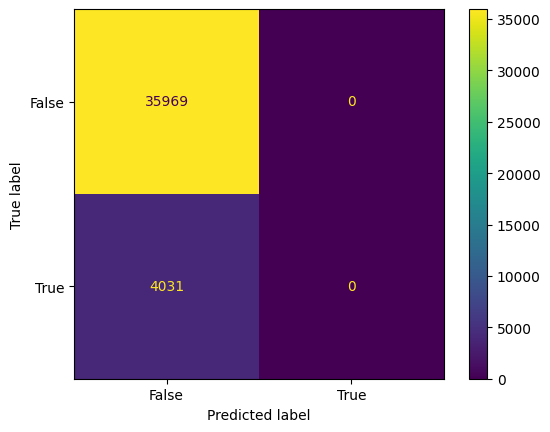

In [30]:
# Matriz de confusão para o KNN : 

y_pred_knn = knn_blam.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##### 2.2.4- Usando o classificador GaussianNB para realizar a classificação : 

In [ ]:
%%time

# Realizando o treino do classificador bayesiano : 

result_bay = list()

bay = GaussianNB()

for i in range(10):
    x, y = shuffle(x, y, random_state = 42)
    result_bay.append(np.mean(cross_val_score(bay, x, y, cv = 10)))
                      
result_bay = np.array(result_bay)
print(f"The accuracy for bayes is {np.mean(result_bay)} +- {statistics.stdev(result_bay)}")

In [ ]:
%%time
# Pegando os dados para a curva AUC gerada pelo modelo bayesiano : 

bay.fit(X_train, y_train)
y_pred_proba_bay = bay.predict_proba(X_test)[:, 1]

fpr_bay, tpr_bay, thresholds_bay = metrics.roc_curve(y_test,  y_pred_proba_bay)
auc_bay = metrics.roc_auc_score(y_test, y_pred_proba_bay)

print(f"The AUC value for the bayes classifier is : {auc_bay}")
print(f"acc Bay in train : {accuracy_score(y_test, y_pred_proba_bay >= 0.5)}")

In [ ]:
# Matriz de confusão para o classificador de bayes : 

y_pred_bay = bay.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_bay)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

#### 2.3- Comparando as curvas ROC e as áreas (AUC) de cada classificador : 

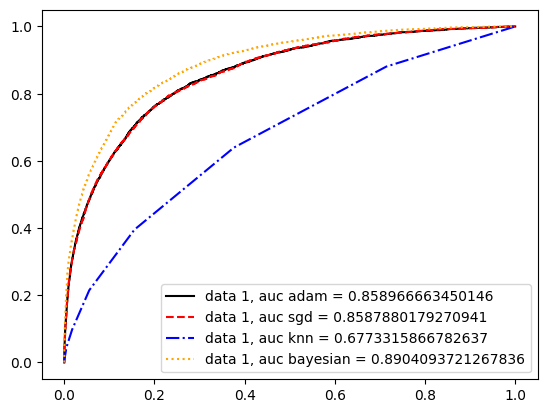

In [34]:
plt.plot(fpr_adam, tpr_adam, label="data 1, auc adam = "+str(auc_adam), linestyle = '-', color = 'black')
plt.legend(loc=4)

plt.plot(fpr_sgd, tpr_sgd, label="data 1, auc sgd = "+str(auc_sgd), linestyle = '--', color = 'red')
plt.legend(loc=4)

plt.plot(fpr_knn, tpr_knn, label="data 1, auc knn = "+str(auc_knn), linestyle = '-.', color = 'blue')
plt.legend(loc=4)

plt.plot(fpr_bay, tpr_bay, label="data 1, auc bayesian = "+str(auc_bay), linestyle = ':', color = 'orange')
plt.legend(loc=4)

plt.show()

Optimal Threshold: 0.5095772732144646
Maximum Accuracy: 0.91465


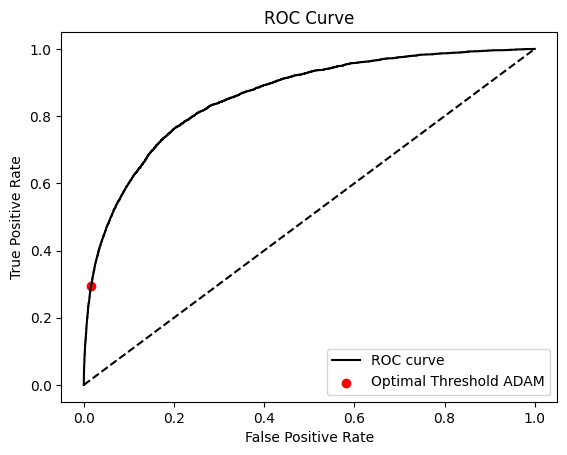

In [35]:
# Compute accuracy for each threshold
accuracies_adam = list()


for threshold in thresholds_adam:
    y_pred = (y_pred_proba_adam >= threshold).astype(int)
    accuracies_adam.append(accuracy_score(y_test, y_pred))
    

# Find the threshold with the maximum accuracy
max_acc_adam_idx = np.argmax(accuracies_adam)
opt_thresh_adam = thresholds_adam[max_acc_adam_idx]
max_accuracy_adam = accuracies_adam[max_acc_adam_idx]


print(f'Optimal Threshold: {opt_thresh_adam}')
print(f'Maximum Accuracy: {max_accuracy_adam}')


plt.figure()
plt.plot(fpr_adam, tpr_adam, label='ROC curve', color = 'black')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr_adam[max_acc_adam_idx], tpr_adam[max_acc_adam_idx], color = 'red', label = 'Optimal Threshold ADAM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

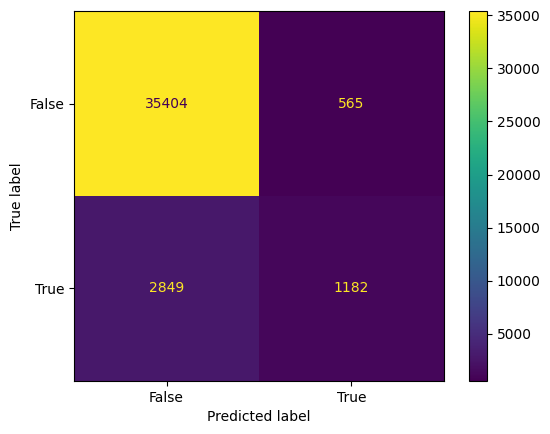

In [36]:
# Matriz de confusão para o ADAM : 

y_pred_adam = (y_pred_proba_adam >= opt_thresh_adam).astype(int)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_adam)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##### 2.4.1- Para o SGD : 

Optimal Threshold: 0.5302602929279148
Maximum Accuracy: 0.9149


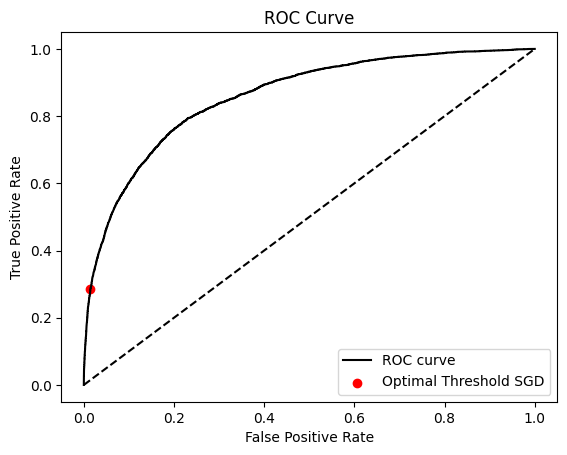

In [37]:
# Compute accuracy for each threshold
accuracies_sgd = list()


for threshold in thresholds_sgd:
    y_pred = (y_pred_proba_sgd >= threshold).astype(int)
    accuracies_sgd.append(accuracy_score(y_test, y_pred))

# Find the threshold with the maximum accuracy
max_acc_sgd_idx = np.argmax(accuracies_sgd)
opt_thresh_sgd = thresholds_sgd[max_acc_sgd_idx]
max_accuracy_sgd = accuracies_sgd[max_acc_sgd_idx]


print(f'Optimal Threshold: {opt_thresh_sgd}')
print(f'Maximum Accuracy: {max_accuracy_sgd}')


plt.figure()
plt.plot(fpr_sgd, tpr_sgd, label='ROC curve', color = 'black')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr_sgd[max_acc_sgd_idx], tpr_sgd[max_acc_sgd_idx], color='red', label='Optimal Threshold SGD')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

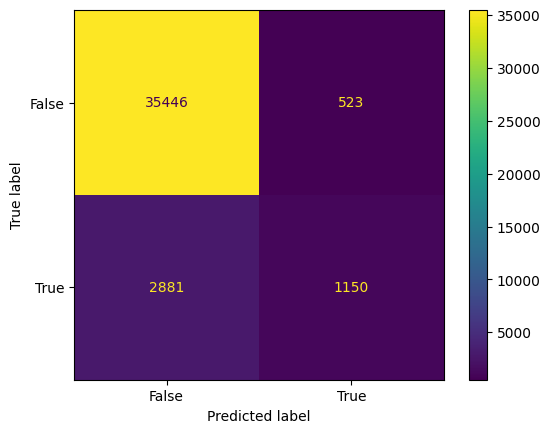

In [38]:
# Matriz de confusão para o ADAM : 

y_pred_sgd = (y_pred_proba_sgd >= opt_thresh_sgd).astype(int)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_sgd)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##### Para o KNN : 

Optimal Threshold: 0.0
Maximum Accuracy: 0.899675


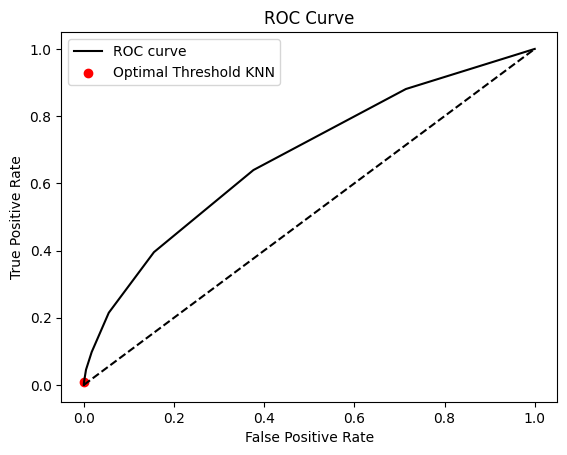

In [39]:
# Compute accuracy for each threshold
accuracies_knn = list()


for threshold in thresholds_knn:
    y_pred = (y_pred_proba_knn >= threshold).astype(int)
    accuracies_knn.append(accuracy_score(y_test, y_pred))

# Find the threshold with the maximum accuracy
max_acc_knn_idx = np.argmax(accuracies_knn)
opt_thresh_knn = y_pred_proba_knn[max_acc_knn_idx]
max_accuracy_knn = accuracies_knn[max_acc_knn_idx]


print(f'Optimal Threshold: {opt_thresh_knn}')
print(f'Maximum Accuracy: {max_accuracy_knn}')


plt.figure()
plt.plot(fpr_knn, tpr_knn, label='ROC curve', color = 'black')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr_knn[max_acc_knn_idx], tpr_knn[max_acc_knn_idx], color='red', label='Optimal Threshold KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

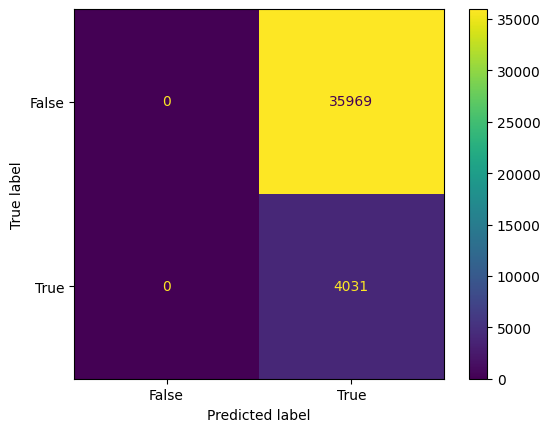

In [40]:
# Matriz de confusão para o KNN : 

y_pred_knn = (knn_blam.predict_proba(X_test) >= opt_thresh_knn).astype(int)[:, 1]

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##### Para o classificador bayesiano :

In [ ]:
# Compute accuracy for each threshold
accuracies_bay = list()


for threshold in thresholds_bay:
    y_pred = (y_pred_proba_bay >= threshold).astype(int)
    accuracies_bay.append(accuracy_score(y_test, y_pred))

# Find the threshold with the maximum accuracy
max_acc_bay_idx = np.argmax(accuracies_bay)
opt_thresh_bay = y_pred_proba_bay[max_acc_bay_idx]
max_accuracy_bay = accuracies_bay[max_acc_bay_idx]


print(f'Optimal Threshold: {opt_thresh_bay}')
print(f'Maximum Accuracy: {max_accuracy_bay}')


plt.figure()
plt.plot(fpr_bay, tpr_bay, label='ROC curve', color = 'black')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr_bay[max_acc_bay_idx], tpr_bay[max_acc_bay_idx], color='red', label='Optimal Threshold BAY')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Matriz de confusão para o Bayes : 

y_pred_bay = (bay.predict_proba(X_test) >= opt_thresh_bay).astype(int)[:, 1]

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_bay)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

#### Plotando as curvas ROC com os pontos de melhor acurácia : 

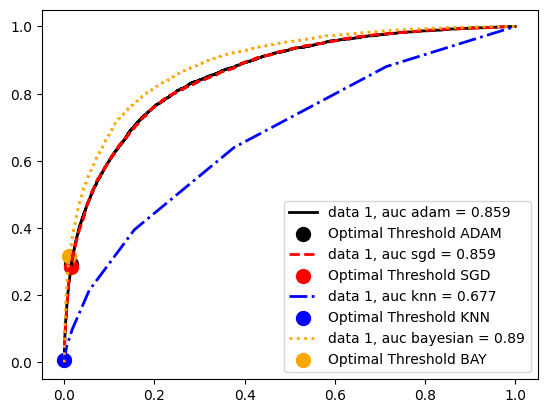

In [43]:
plt.plot(fpr_adam, tpr_adam, label="data 1, auc adam = "+str(round(auc_adam, 3)), linestyle = '-', color = 'black', linewidth = 2)
plt.scatter(fpr_adam[max_acc_adam_idx], tpr_adam[max_acc_adam_idx], color='black', label='Optimal Threshold ADAM', s = 100)
plt.legend(loc=4)

plt.plot(fpr_sgd, tpr_sgd, label="data 1, auc sgd = "+str(round(auc_sgd, 3)), linestyle = '--', color = 'red', linewidth = 2)
plt.scatter(fpr_sgd[max_acc_sgd_idx], tpr_sgd[max_acc_sgd_idx], color='red', label='Optimal Threshold SGD', s = 100)
plt.legend(loc=4)

plt.plot(fpr_knn, tpr_knn, label="data 1, auc knn = "+str(round(auc_knn, 3)), linestyle = '-.', color = 'blue', linewidth = 2)
plt.scatter(fpr_knn[max_acc_knn_idx], tpr_knn[max_acc_knn_idx], color='blue', label='Optimal Threshold KNN', s = 100)
plt.legend(loc=4)

plt.plot(fpr_bay, tpr_bay, label="data 1, auc bayesian = "+str(round(auc_bay, 3)), linestyle = ':', color = 'orange', linewidth = 2)
plt.scatter(fpr_bay[max_acc_bay_idx], tpr_bay[max_acc_bay_idx], color='orange', label='Optimal Threshold BAY', s = 100)
plt.legend(loc=4)

plt.show()

### Com o modelo já treinado e os melhores hyperparâmetros em conjunto com o threshold, iremos testá-lo : 

### 3- Testando o modelo : 

#### 3.1- Analisando o dataset de teste : 

In [ ]:
test = pd.read_csv("test.csv")
test.head()

In [ ]:
test.describe()

In [ ]:
nan = np.array(test.isna().sum())
for i in nan:
    if i != 0:
        print(f"{i} is != 0")

In [ ]:
ID_code = test.loc[:, 'ID_code']

In [ ]:
test = test.loc[:, ~test.columns.isin(['ID_code'])]
test.head()

In [ ]:
test = scaler.fit_transform(test)
test.shape

#### 3.3- Realizando a predição de cada uma das 2 redes : 

##### 3.3.1- Predição para o ADAM : 

In [ ]:
pred_adam = mlp_adam.predict_proba(test)[:, 1]
class_adam = (pred_adam >= opt_thresh_adam).astype(int)


predictions_adam = np.column_stack((ID_code, class_adam))

# Create the DataFrame
predictions_adam = pd.DataFrame(predictions_adam, columns=['ID_code', 'target'])
predictions_adam.loc[:, 'target'] = predictions_adam.loc[:, 'target'].astype(int)
predictions_adam.to_csv('predictions_adam.csv', index=False)

In [ ]:
np.unique(class_adam, return_counts = True)

##### 3.3.1- Predição para o SGD : 

In [ ]:
pred_sgd = mlp_sgd.predict_proba(test)[:, 1]
class_sgd = (pred_sgd >= opt_thresh_sgd).astype(int)


predictions_sgd = np.column_stack((ID_code, class_sgd))

# Create the DataFrame
predictions_sgd = pd.DataFrame(predictions_sgd, columns=['ID_code', 'target'])
predictions_sgd.loc[:, 'target'] = predictions_sgd.loc[:, 'target'].astype(int)
predictions_sgd.to_csv('predictions_sgd.csv', index=False)

In [ ]:
np.unique(class_sgd, return_counts = True)

In [ ]:
pred_bay = bay.predict(test)


predictions_bay = np.column_stack((ID_code, pred_bay))

# Create the DataFrame
predictions_bay = pd.DataFrame(predictions_bay, columns=['ID_code', 'target'])
predictions_bay.loc[:, 'target'] = predictions_bay.loc[:, 'target'].astype(int)
predictions_bay.to_csv('predictions_bay.csv', index=False)

In [ ]:
np.unique(pred_bay, return_counts = True)

In [ ]:
%%time
pred_knn = knn_blam.predict(test)


predictions_knn = np.column_stack((ID_code, pred_knn))

# Create the DataFrame
predictions_knn = pd.DataFrame(predictions_knn, columns=['ID_code', 'target'])
predictions_knn.loc[:, 'target'] = predictions_knn.loc[:, 'target'].astype(int)
predictions_knn.to_csv('predictions_knn.csv', index=False)

In [ ]:
np.unique(pred_knn, return_counts = True)

In [ ]:
neigh_2 = KNeighborsClassifier(n_neighbors = 500)

y_pred_proba_knn_2 = neigh_2.fit(X_train, y_train).predict_proba(X_test)[:, 1]

fpr_knn_2, tpr_knn_2, thresholds_knn_2 = metrics.roc_curve(y_test,  y_pred_proba_knn_2)
auc_knn_2 = metrics.roc_auc_score(y_test, y_pred_proba_knn_2)

print(f"The AUC value for the knn is : {auc_knn_2}")
print(f"acc KNN in test : {accuracy_score(y_test, y_pred_proba_knn_2 >= 0.5)}")

In [ ]:
# Compute accuracy for each threshold
accuracies_knn_2 = list()


for threshold in thresholds_knn_2:
    y_pred = (y_pred_proba_knn_2 >= threshold).astype(int)
    accuracies_knn_2.append(accuracy_score(y_test, y_pred))

# Find the threshold with the maximum accuracy
max_acc_knn_idx_2 = np.argmax(accuracies_knn_2)
opt_thresh_knn_2 = y_pred_proba_knn_2[max_acc_knn_idx_2]
max_accuracy_knn_2 = accuracies_knn_2[max_acc_knn_idx_2]


print(f'Optimal Threshold: {opt_thresh_knn_2}')
print(f'Maximum Accuracy: {max_accuracy_knn_2}')


plt.figure()
plt.plot(fpr_knn_2, tpr_knn_2, label='ROC curve', color = 'black')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr_knn_2[max_acc_knn_idx_2], tpr_knn_2[max_acc_knn_idx_2], color='red', label='Optimal Threshold KNN, k = 500')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.plot(fpr_knn, tpr_knn, label="data 1, auc knn = "+str(round(auc_knn, 3)), linestyle = '-.', color = 'blue', linewidth = 2)
plt.scatter(fpr_knn[max_acc_knn_idx], tpr_knn[max_acc_knn_idx], color='blue', label='Optimal Threshold KNN = 49', s = 100)
plt.legend(loc=4)

plt.plot(fpr_knn_2, tpr_knn_2, label="data 1, auc knn_2 = "+str(round(auc_knn_2, 3)), linestyle = '-.', color = 'black', linewidth = 2)
plt.scatter(fpr_knn_2[max_acc_knn_idx_2], tpr_knn_2[max_acc_knn_idx_2], color='black', label='Optimal Threshold KNN with k = 500', s = 100)
plt.legend(loc=4)


plt.show()